In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
path = "C:/Users/sanja/Downloads/2019.csv"
df_raw = pd.read_csv(path)

In [11]:
df_raw.shape

(156, 9)

In [12]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [13]:
df_raw.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [21]:
df_raw.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [23]:
feature_cols = ['GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']

In [24]:
df_raw[feature_cols].describe()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


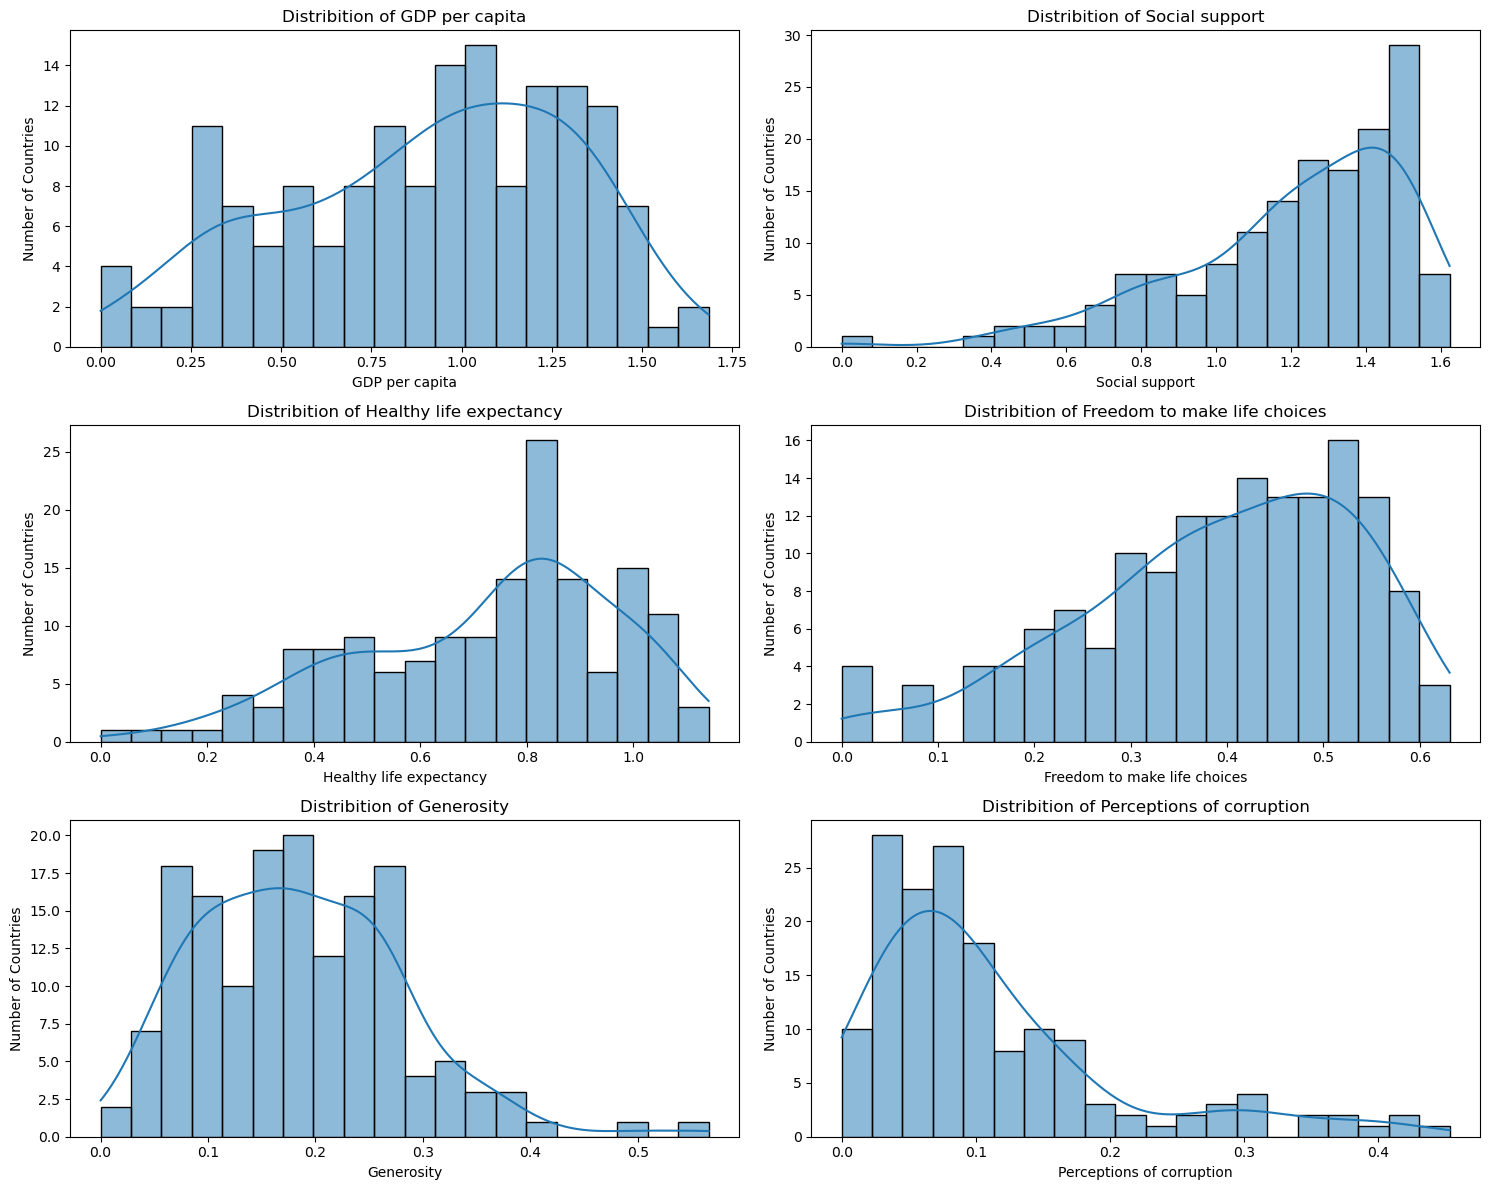

In [36]:
plt.figure(figsize=(15,12))

for i, col in enumerate(feature_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(df_raw[col], kde=True, bins=20)
    plt.title(f'Distribition of {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Countries')

plt.tight_layout()
plt.show()

In [41]:
df_raw[feature_cols].skew().sort_values(ascending=False).round(2)

Perceptions of corruption       1.65
Generosity                      0.75
GDP per capita                 -0.39
Healthy life expectancy        -0.61
Freedom to make life choices   -0.69
Social support                 -1.13
dtype: float64

Perceptions of Corruption is strongly right-skewed (1.65), indicating that most countries perceive low corruption, while a few report very high corruption levels.

Generosity is moderately right-skewed (0.75), suggesting that most countries score low on generosity, with a few outliers being highly generous.

GDP per capita is slightly left-skewed (-0.39), showing that most countries have moderate-to-high income, with a few low-income outliers.

Healthy Life Expectancy and Freedom both show moderate left skew (~-0.6 to -0.7), indicating generally strong outcomes in these areas across countries.

Social Support is strongly left-skewed (-1.13), showing that most countries report high social support levels.

In [44]:
top_gdp = df_raw[['Country or region', 'GDP per capita']].sort_values(by='GDP per capita', ascending=False).head(10)
print(top_gdp)

       Country or region  GDP per capita
28                 Qatar           1.684
13            Luxembourg           1.609
33             Singapore           1.572
20  United Arab Emirates           1.503
50                Kuwait           1.500
15               Ireland           1.499
2                 Norway           1.488
5            Switzerland           1.452
75             Hong Kong           1.438
18         United States           1.433


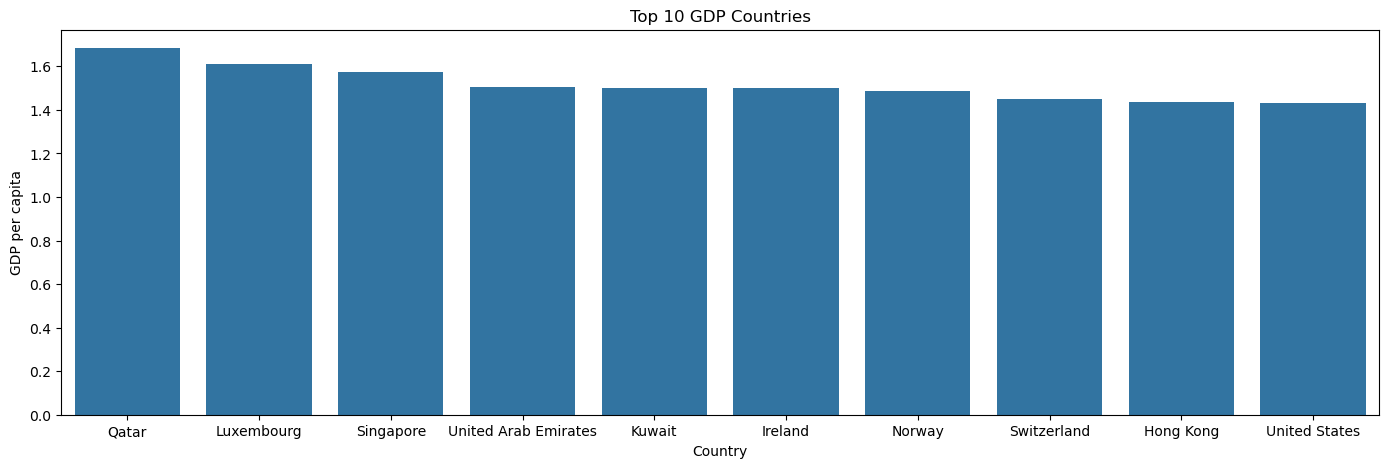

In [60]:
plt.figure(figsize=(17, 5))

sns.barplot(data=top_gdp, x='Country or region', y='GDP per capita')
plt.title('Top 10 GDP Countries')
plt.xlabel('Country')
plt.ylabel('GDP per capita')
#plt.tight_layout()
plt.show()

In [56]:
top_least_corrupted_countries = df_raw[['Country or region', 'Perceptions of corruption']].sort_values(by='Perceptions of corruption', ascending=True).head(10)
print(top_least_corrupted_countries)

          Country or region  Perceptions of corruption
70                  Moldova                      0.000
96                 Bulgaria                      0.004
47                  Romania                      0.005
45                   Kosovo                      0.006
77   Bosnia and Herzegovina                      0.006
132                 Ukraine                      0.010
37                 Slovakia                      0.014
38        Trinidad & Tobago                      0.016
61                  Hungary                      0.020
74                  Croatia                      0.022


In [53]:
top_corrupted_countries = df_raw[['Country or region', 'Perceptions of corruption']].sort_values(by='Perceptions of corruption', ascending=False).head(10)
print(top_corrupted_countries)

    Country or region  Perceptions of corruption
33          Singapore                      0.453
151            Rwanda                      0.411
1             Denmark                      0.410
0             Finland                      0.393
7         New Zealand                      0.380
6              Sweden                      0.373
5         Switzerland                      0.343
2              Norway                      0.341
13         Luxembourg                      0.316
15            Ireland                      0.310


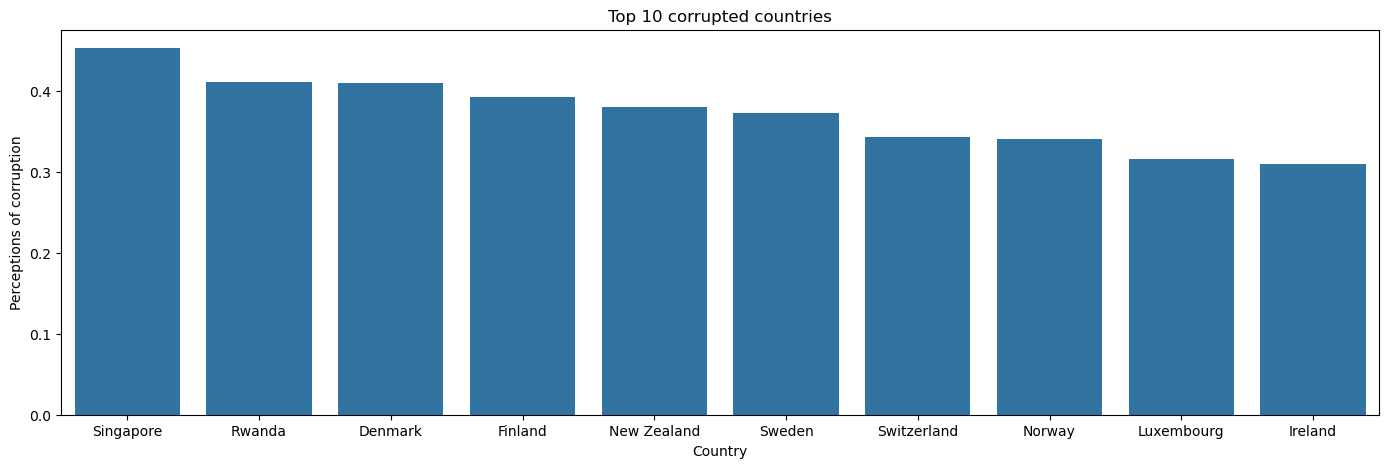

In [59]:
plt.figure(figsize=(17, 5))

sns.barplot(data=top_corrupted_countries, x='Country or region', y='Perceptions of corruption')
plt.title('Top 10 corrupted countries')
plt.xlabel('Country')
plt.ylabel('Perceptions of corruption')
#plt.tight_layout()
plt.show()

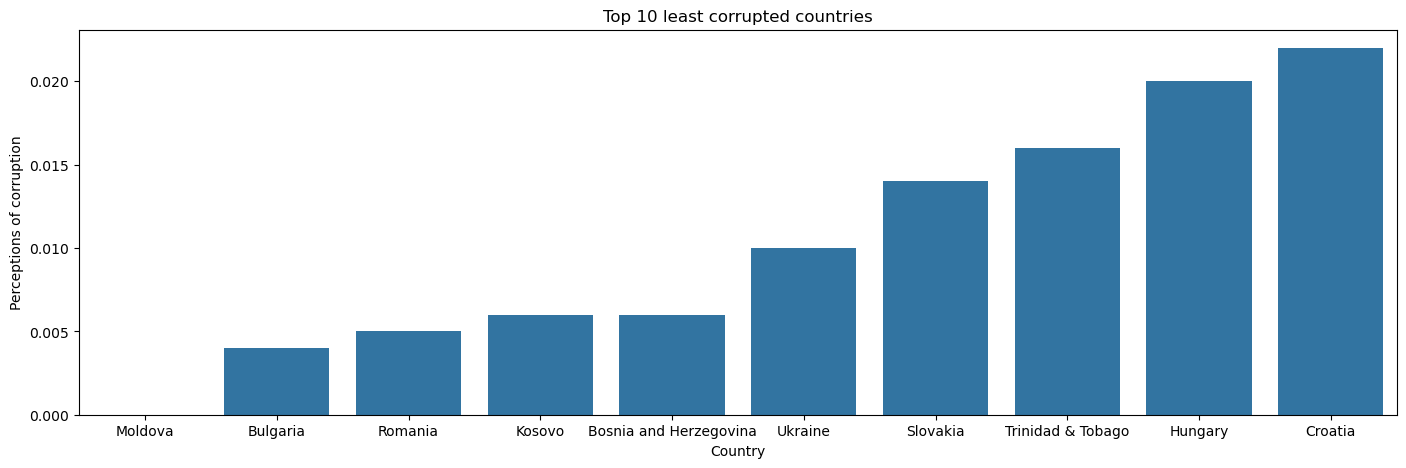

In [58]:
plt.figure(figsize=(17, 5))

sns.barplot(data=top_least_corrupted_countries, x='Country or region', y='Perceptions of corruption')
plt.title('Top 10 least corrupted countries')
plt.xlabel('Country')
plt.ylabel('Perceptions of corruption')
#plt.tight_layout()
plt.show()

In [61]:
top_healthy_index_countries = df_raw[['Country or region', 'Healthy life expectancy']].sort_values(by='Healthy life expectancy', ascending=False).head(10)
print(top_healthy_index_countries)

   Country or region  Healthy life expectancy
33         Singapore                    1.141
75         Hong Kong                    1.122
57             Japan                    1.088
29             Spain                    1.062
5        Switzerland                    1.052
23            France                    1.045
48            Cyprus                    1.042
63   Northern Cyprus                    1.042
35             Italy                    1.039
8             Canada                    1.039


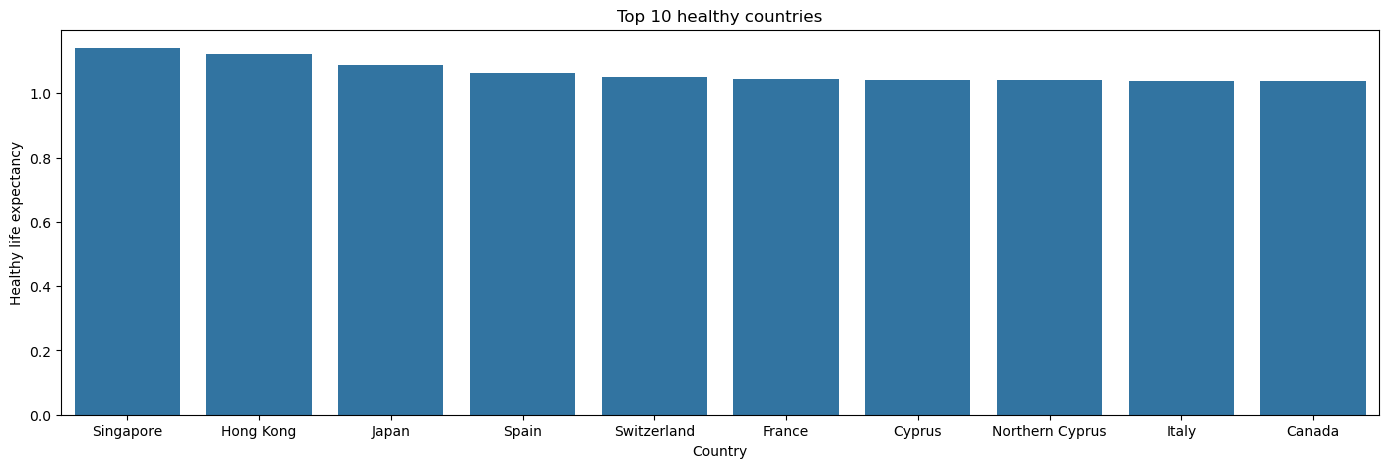

In [ ]:
plt.figure(figsize=(17, 5))

sns.barplot(data=top_healthy_index_countries, x='Country or region', y='Healthy life expectancy')
plt.title('Top 10 healthy countries')
plt.xlabel('Country')
plt.ylabel('Healthy life expectancy')
plt.show()

    Country or region  Generosity
130           Myanmar       0.566
91          Indonesia       0.498
146             Haiti       0.419
21              Malta       0.375
120             Kenya       0.372
94             Bhutan       0.370
51           Thailand       0.359
3             Iceland       0.354
14     United Kingdom       0.348
10          Australia       0.332


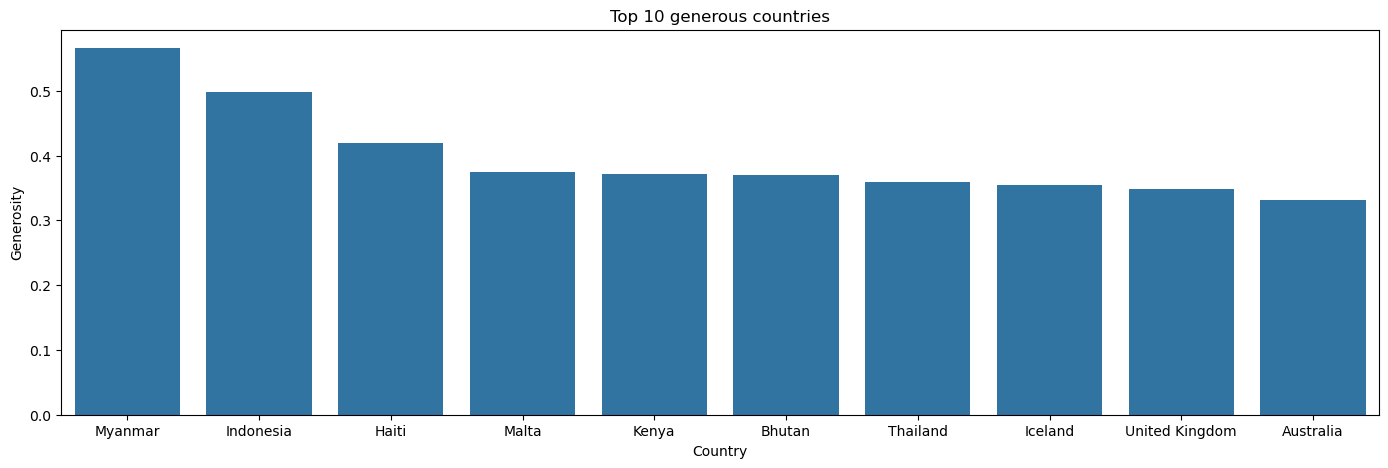

In [63]:
top_generous_countries = df_raw[['Country or region', 'Generosity']].sort_values(by='Generosity', ascending=False).head(10)
print(top_generous_countries)

plt.figure(figsize=(17, 5))

sns.barplot(data=top_generous_countries, x='Country or region', y='Generosity')
plt.title('Top 10 generous countries')
plt.xlabel('Country')
plt.ylabel('Generosity')
plt.show()

   Country or region  Social support
3            Iceland           1.624
0            Finland           1.587
2             Norway           1.582
1            Denmark           1.573
7        New Zealand           1.557
15           Ireland           1.553
10         Australia           1.548
86      Turkmenistan           1.538
14    United Kingdom           1.538
82          Mongolia           1.531


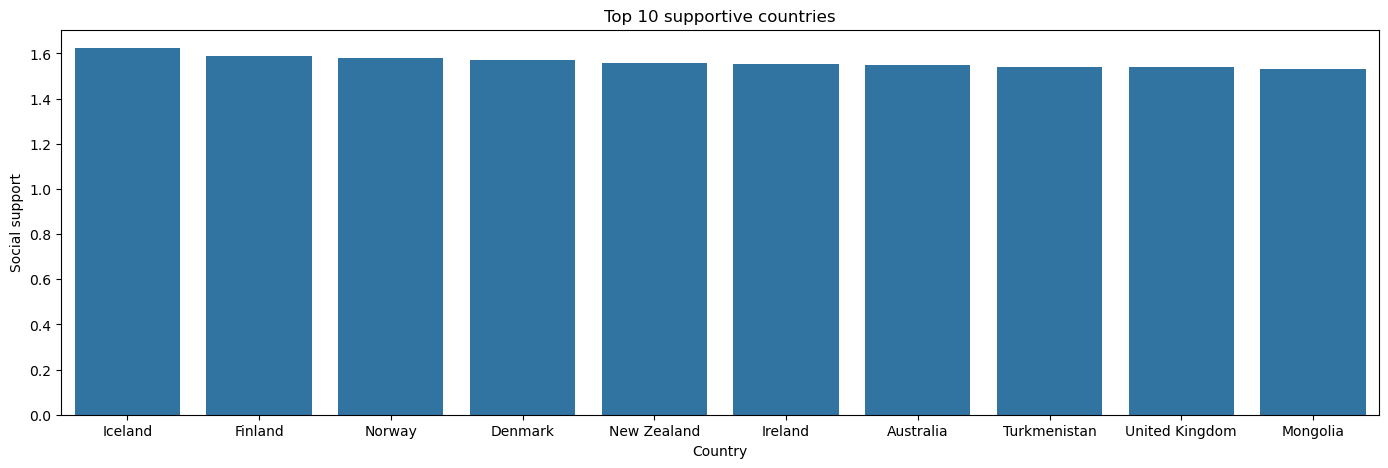

In [64]:
top_social_supportive_countries = df_raw[['Country or region', 'Social support']].sort_values(by='Social support', ascending=False).head(10)
print(top_social_supportive_countries)

plt.figure(figsize=(17, 5))

sns.barplot(data=top_social_supportive_countries, x='Country or region', y='Social support')
plt.title('Top 10 supportive countries')
plt.xlabel('Country')
plt.ylabel('Social support')
plt.show()

        Country or region  Freedom to make life choices
40             Uzbekistan                         0.631
108              Cambodia                         0.609
2                  Norway                         0.603
20   United Arab Emirates                         0.598
0                 Finland                         0.596
1                 Denmark                         0.592
3                 Iceland                         0.591
7             New Zealand                         0.585
8                  Canada                         0.584
6                  Sweden                         0.574


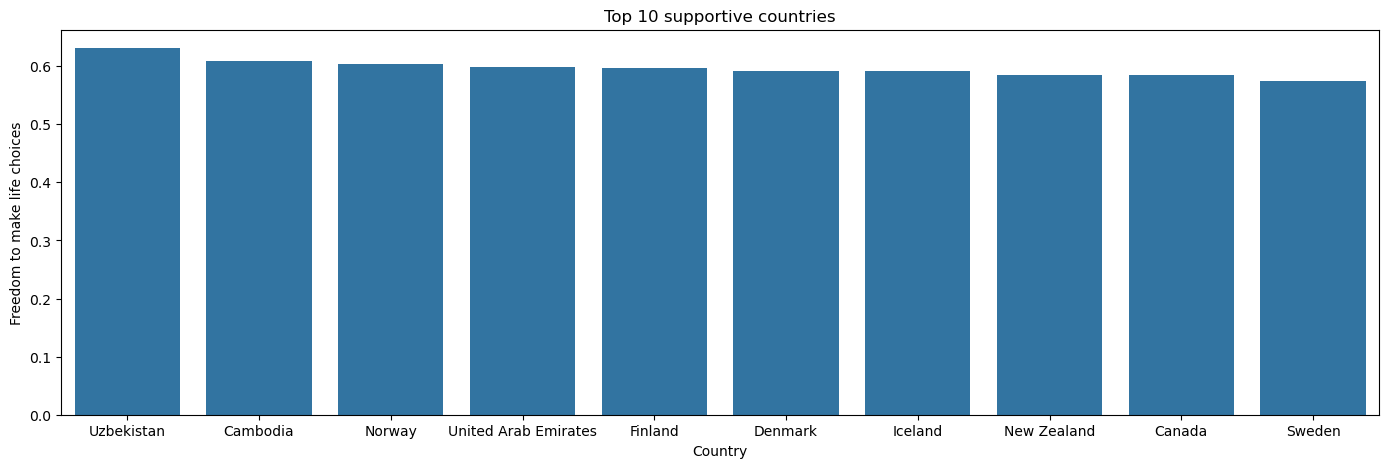

In [69]:
top_freedom_countries = df_raw[['Country or region', 'Freedom to make life choices']].sort_values(by='Freedom to make life choices', ascending=False).head(10)
print(top_freedom_countries)

plt.figure(figsize=(17, 5))

sns.barplot(data=top_freedom_countries, x='Country or region', y='Freedom to make life choices')
plt.title('Top 10 supportive countries')
plt.xlabel('Country')
plt.ylabel('Freedom to make life choices')
plt.show()

    Country or region  Freedom to make life choices
153       Afghanistan                         0.000
155       South Sudan                         0.010
148             Syria                         0.013
146             Haiti                         0.026
121        Mauritania                         0.066
81             Greece                         0.067
87            Algeria                         0.086
141           Comoros                         0.142
150             Yemen                         0.143
142        Madagascar                         0.148


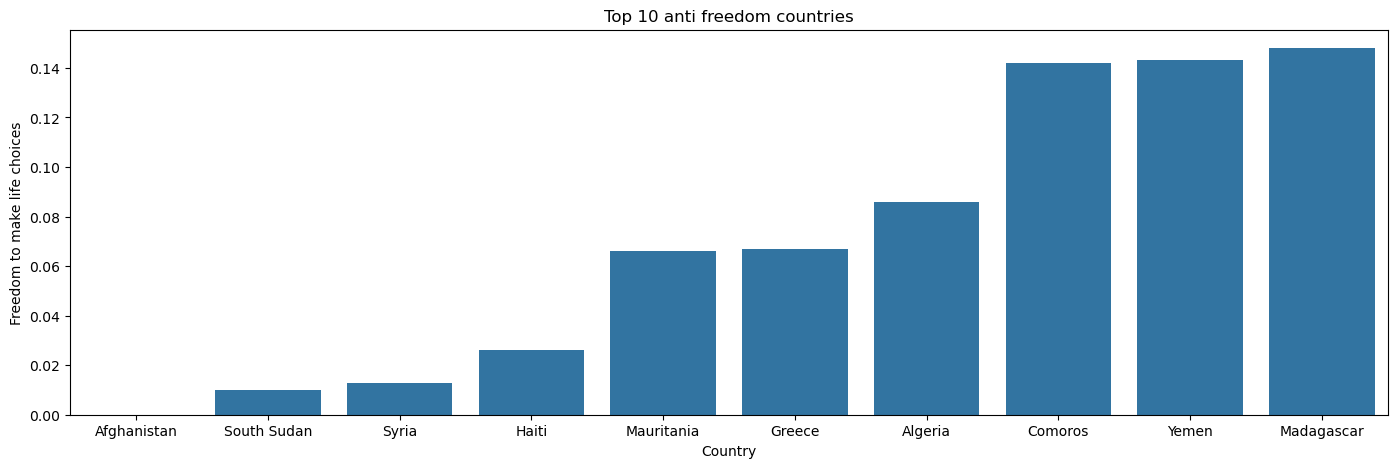

In [67]:
top_anti_freedom_countries = df_raw[['Country or region', 'Freedom to make life choices']].sort_values(by='Freedom to make life choices', ascending=True).head(10)
print(top_anti_freedom_countries)

plt.figure(figsize=(17, 5))

sns.barplot(data=top_anti_freedom_countries, x='Country or region', y='Freedom to make life choices')
plt.title('Top 10 anti freedom countries')
plt.xlabel('Country')
plt.ylabel('Freedom to make life choices')
plt.show()

In [68]:
'North Korea' in df_raw['Country or region'].values

False

In [72]:
correlation = df_raw[feature_cols].corr()
print(correlation)

                              GDP per capita  Social support  \
GDP per capita                      1.000000        0.754906   
Social support                      0.754906        1.000000   
Healthy life expectancy             0.835462        0.719009   
Freedom to make life choices        0.379079        0.447333   
Generosity                         -0.079662       -0.048126   
Perceptions of corruption           0.298920        0.181899   

                              Healthy life expectancy  \
GDP per capita                               0.835462   
Social support                               0.719009   
Healthy life expectancy                      1.000000   
Freedom to make life choices                 0.390395   
Generosity                                  -0.029511   
Perceptions of corruption                    0.295283   

                              Freedom to make life choices  Generosity  \
GDP per capita                                    0.379079   -0.079662   
Soc

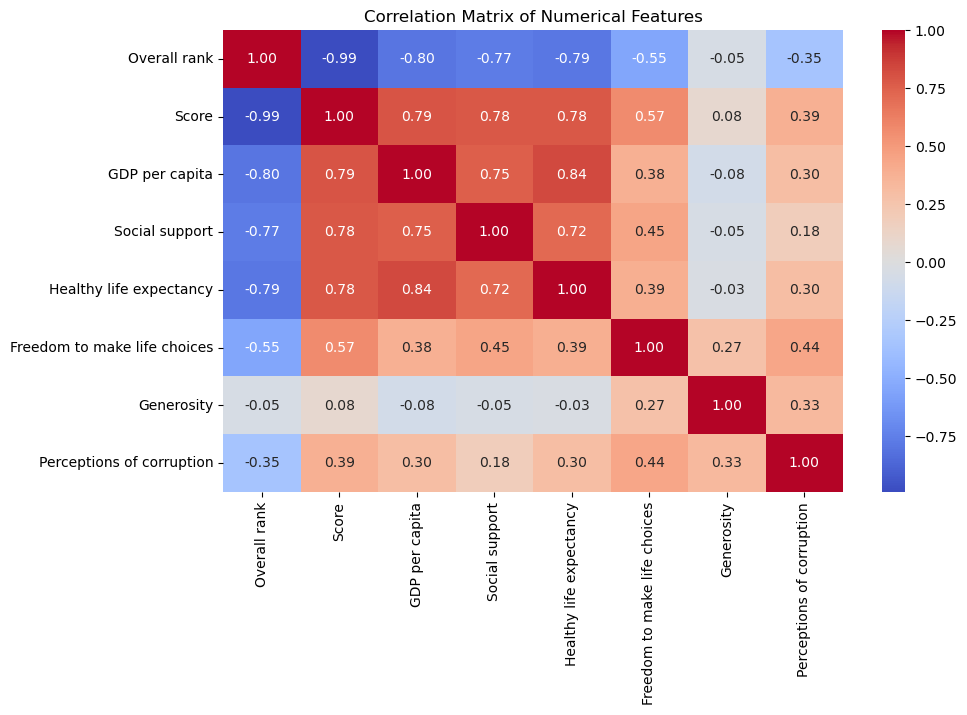

In [73]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_raw.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


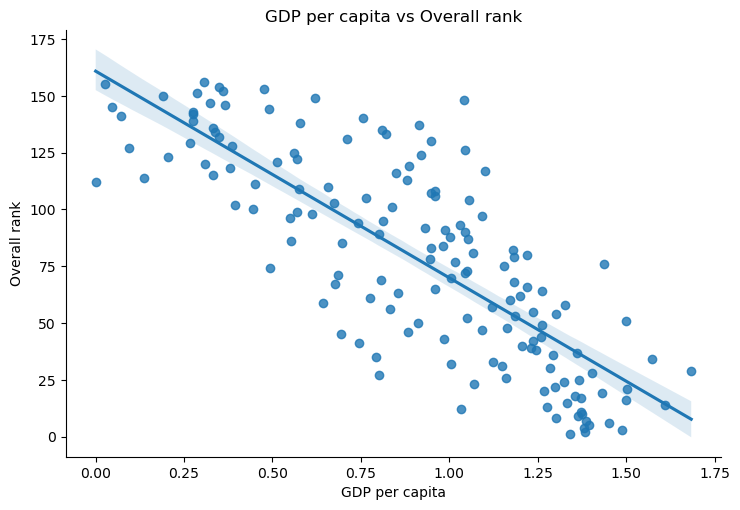

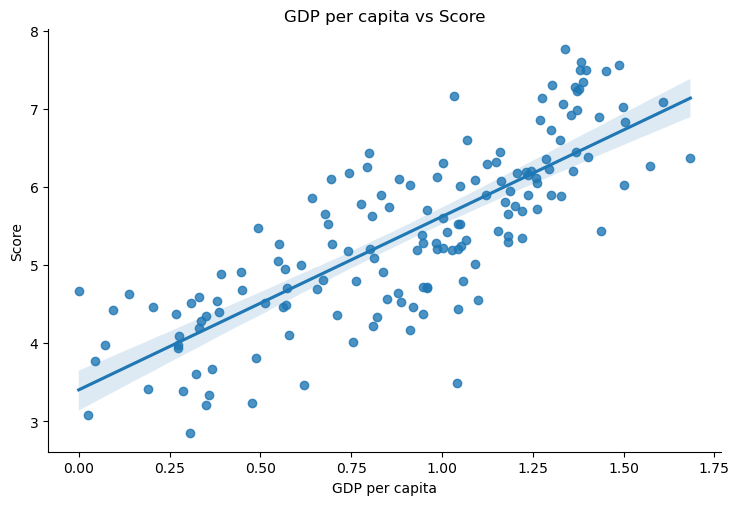

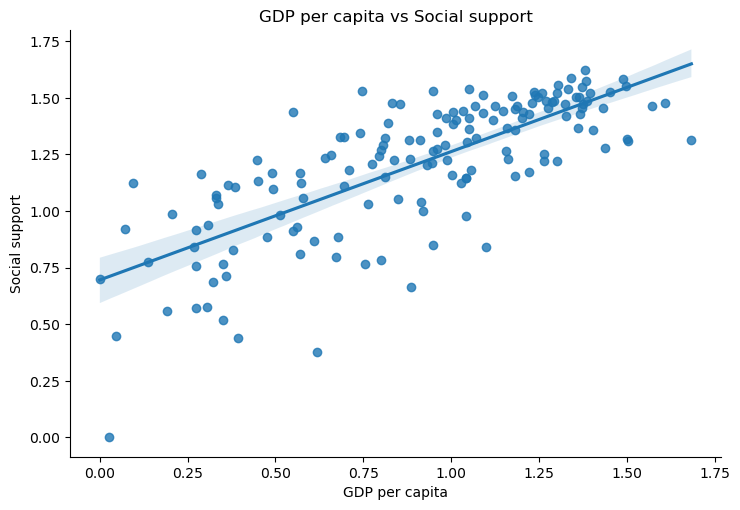

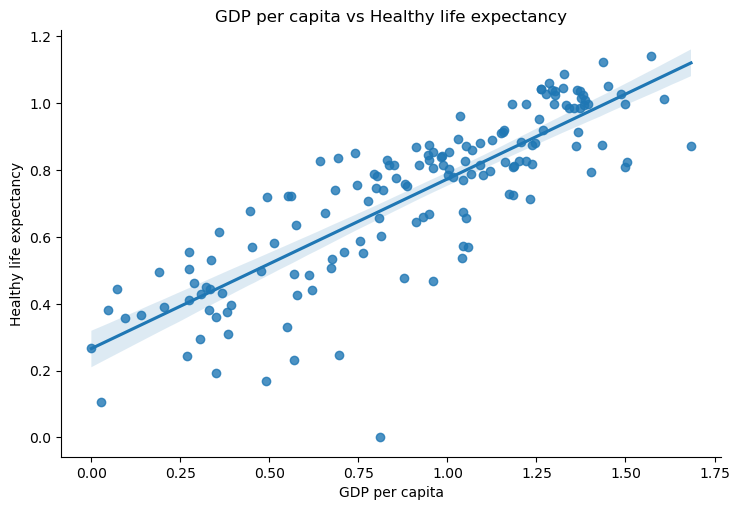

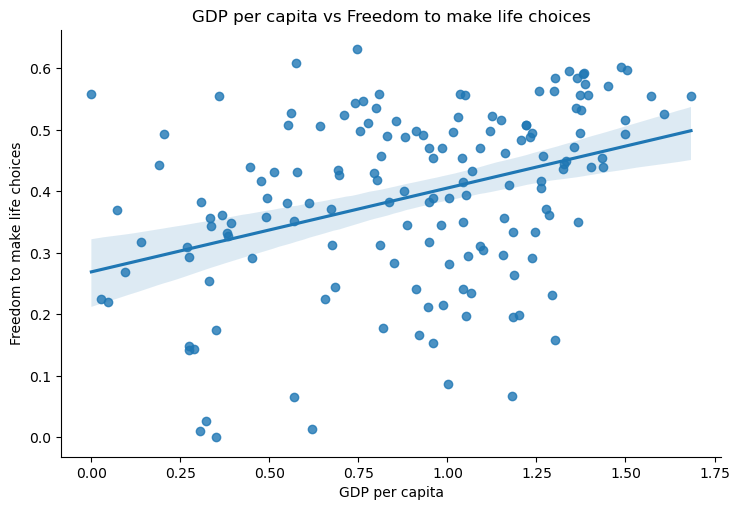

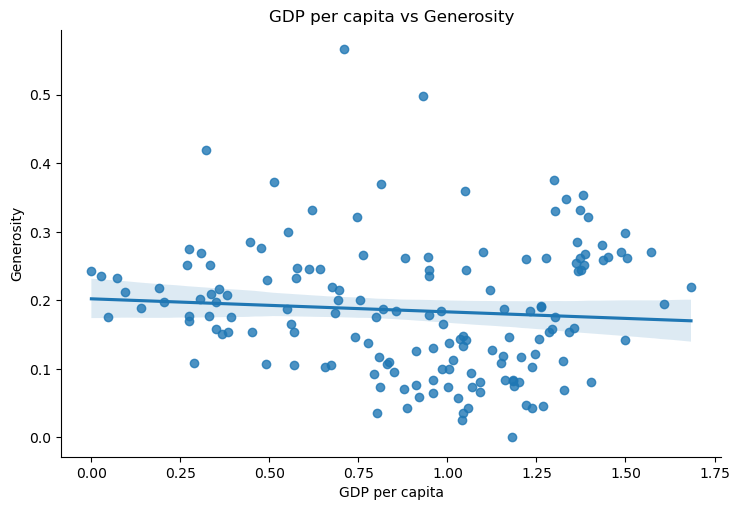

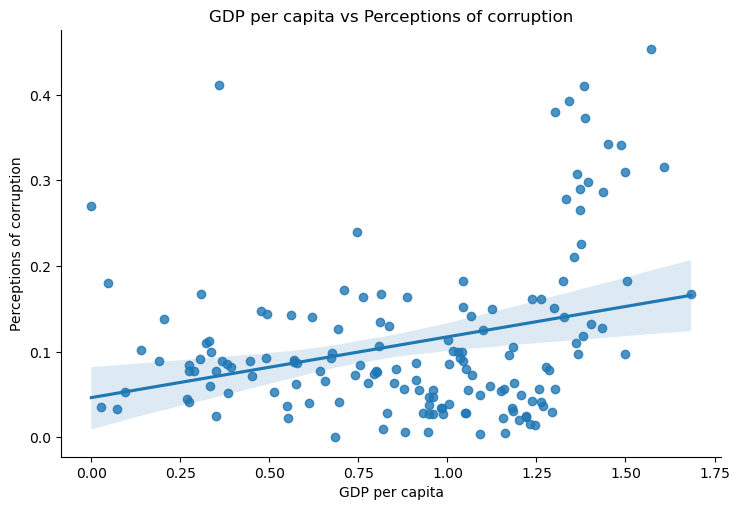

In [74]:
target = 'GDP per capita'
others = [col for col in df_raw.columns if col != target and df_raw[col].dtype != 'O']

for feature in others:
    sns.lmplot(data=df_raw, x=target, y=feature, height=5, aspect=1.5)
    plt.title(f'{target} vs {feature}')
    plt.show()


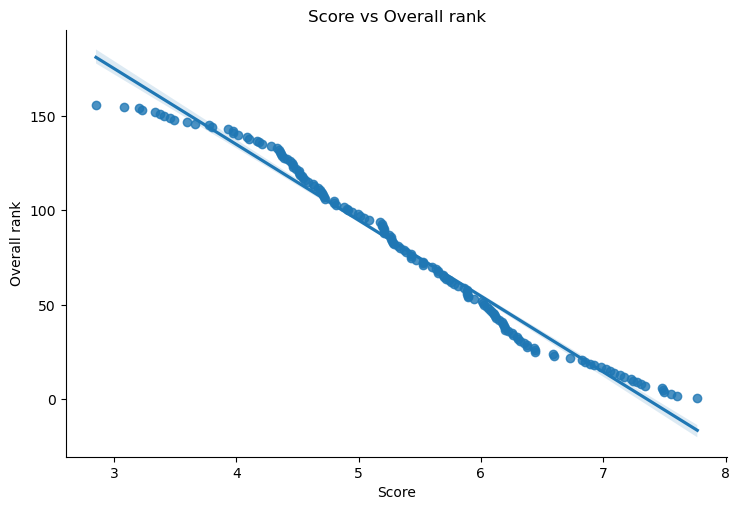

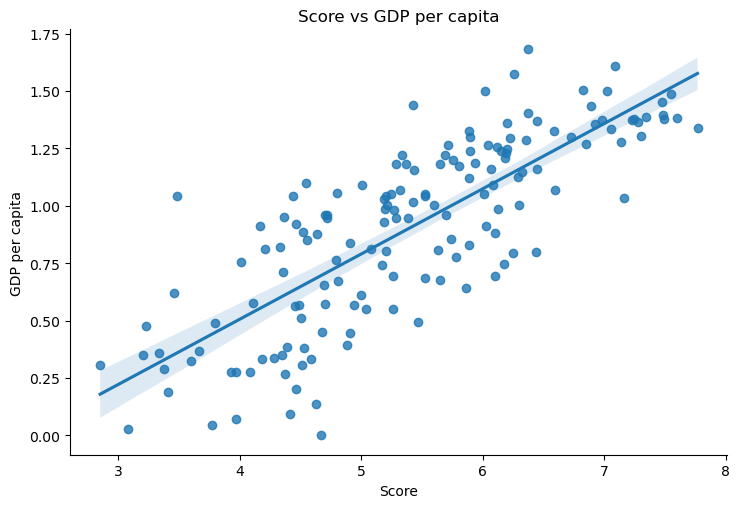

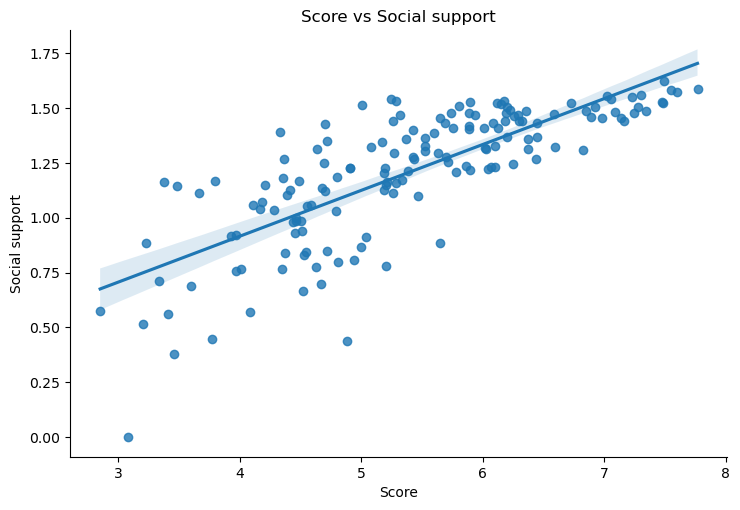

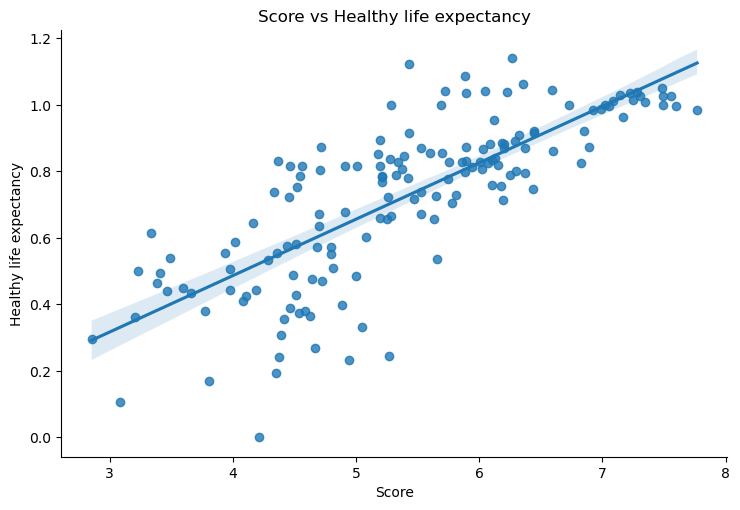

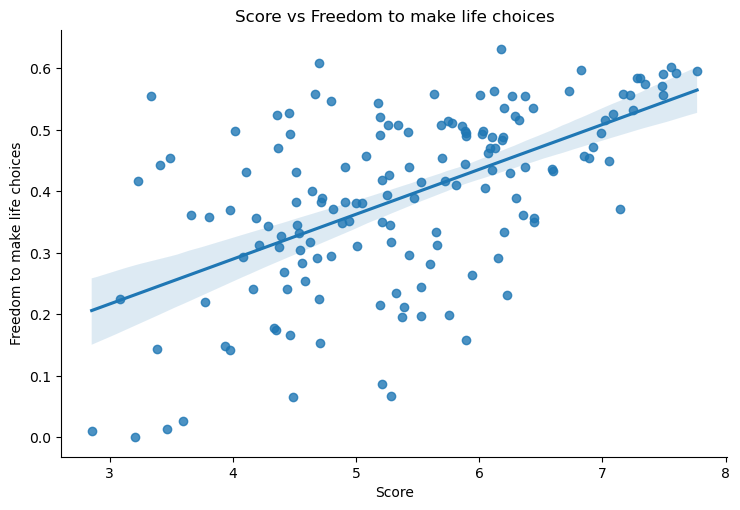

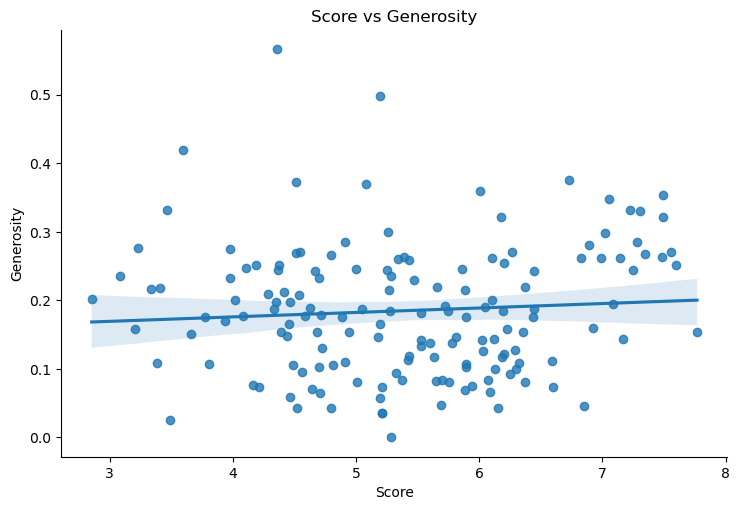

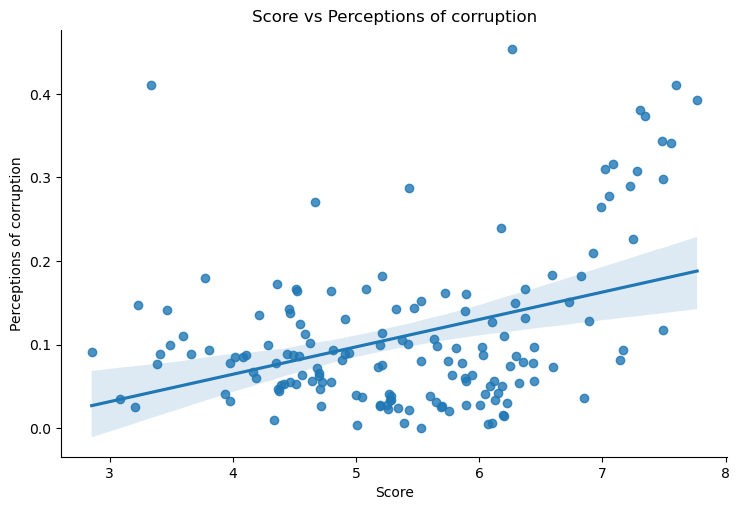

In [75]:
target = 'Score'
others = [col for col in df_raw.columns if col != target and df_raw[col].dtype != 'O']

for feature in others:
    sns.lmplot(data=df_raw, x=target, y=feature, height=5, aspect=1.5)
    plt.title(f'{target} vs {feature}')
    plt.show()


GDP per capita                  0.793883
Healthy life expectancy         0.779883
Social support                  0.777058
Freedom to make life choices    0.566742
Perceptions of corruption       0.385613
Generosity                      0.075824
Name: Score, dtype: float64


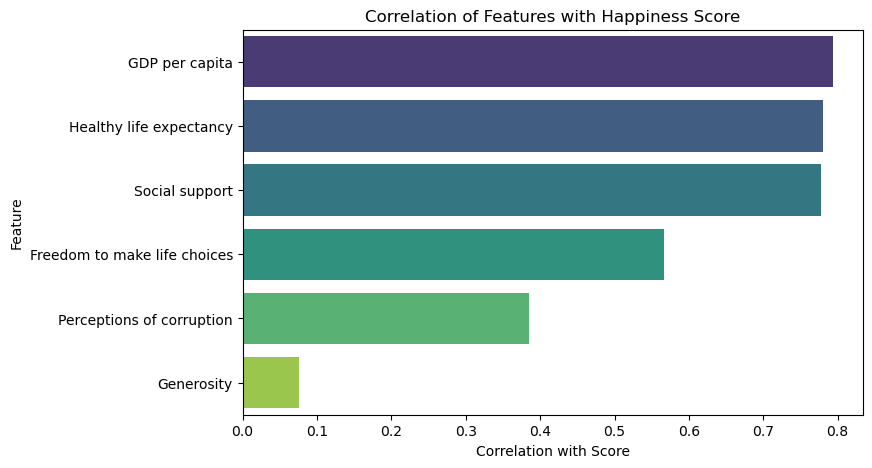

In [84]:
score_corr = df_raw.corr(numeric_only=True)['Score'].drop(['Score', 'Overall rank'])
score_corr = score_corr.sort_values(ascending=False)
print(score_corr)

plt.figure(figsize=(8,5))
sns.barplot(x=score_corr.values, y=score_corr.index, palette='viridis', hue=score_corr.index)
plt.title('Correlation of Features with Happiness Score')
plt.xlabel('Correlation with Score')
plt.ylabel('Feature')
plt.show()


In [94]:
top10_happy_countries = df_raw.sort_values(by='Score', ascending=False).head(10)
bottom10_happy_countries = df_raw.sort_values(by='Score').head(10)

print(top10_happy_countries)
print('\n')
print(bottom10_happy_countries)

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   
5             6       Switzerland  7.480           1.452           1.526   
6             7            Sweden  7.343           1.387           1.487   
7             8       New Zealand  7.307           1.303           1.557   
8             9            Canada  7.278           1.365           1.505   
9            10           Austria  7.246           1.376           1.475   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                  

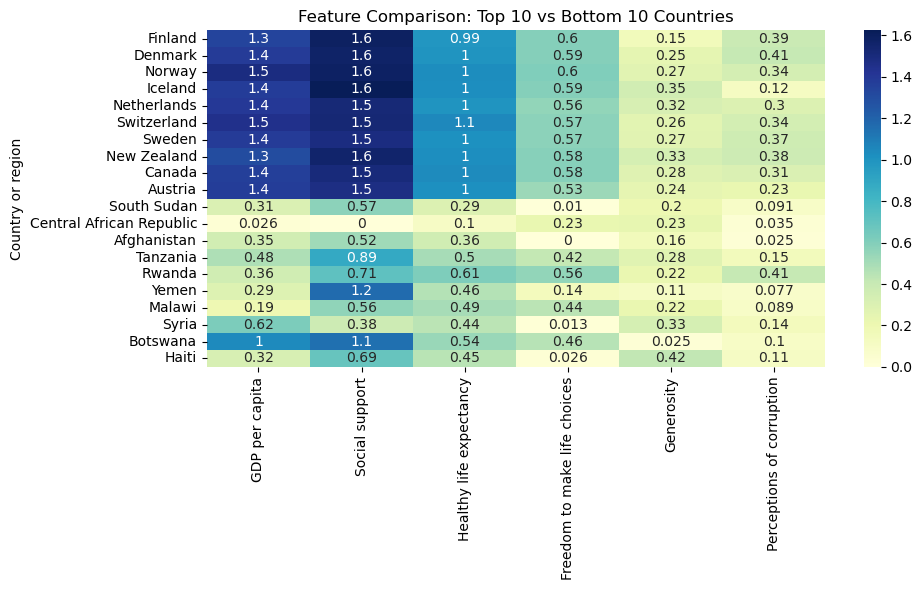

In [93]:
compare_df = pd.concat([top10_happy_countries, bottom10_happy_countries]).drop_duplicates(subset='Country or region')
compare_df.set_index('Country or region', inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(compare_df[feature_cols], annot=True, cmap='YlGnBu')
plt.title('Feature Comparison: Top 10 vs Bottom 10 Countries')
plt.tight_layout()
plt.show()
